In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bjontegaard_metric import BD_RATE, BD_PSNR

In [2]:
csvdir1 = 'csvfiles/anchor.csv'
csvdir2 = 'csvfiles/tested.csv'

df1 = pd.read_csv(csvdir1)
df2 = pd.read_csv(csvdir2)

print(csvdir1, '\n', df1)
print(csvdir2, '\n', df2)

csvfiles/anchor.csv 
                         Sequences Variant  Num input points       bpp  \
0  house_without_roof_00057_vox12     r01           4848745  0.035006   
1  house_without_roof_00057_vox12     r02           4848745  0.083641   
2  house_without_roof_00057_vox12     r03           4848745  0.222999   
3  house_without_roof_00057_vox12     r04           4848745  0.541356   
4  house_without_roof_00057_vox12     r05           4848745  1.132499   
5  house_without_roof_00057_vox12     r06           4848745  2.128005   

   Bitstream     PSNR  PSNR-Cb  PSNR-Cr  
0     169736  27.2550  37.7976  41.4287  
1     405552  28.9008  39.9605  41.9792  
2    1081264  31.0506  41.1282  42.6758  
3    2624896  34.1129  42.5536  43.7337  
4    5491200  38.0473  44.3481  45.2075  
5   10318152  42.4314  46.5919  47.1980  
csvfiles/tested.csv 
                         Sequences Variant  Num input points       bpp  \
0  house_without_roof_00057_vox12     r01           4848745  0.013505   
1  h

In [3]:
R1 = df1['bpp']
PSNR1 = df1['PSNR']

R2 = df2['bpp']
PSNR2 = df2['PSNR']

bdrate = BD_RATE(R1, PSNR1, R2, PSNR2, piecewise=0)
print('bdrate', bdrate)

bdrate -11.113711998150254


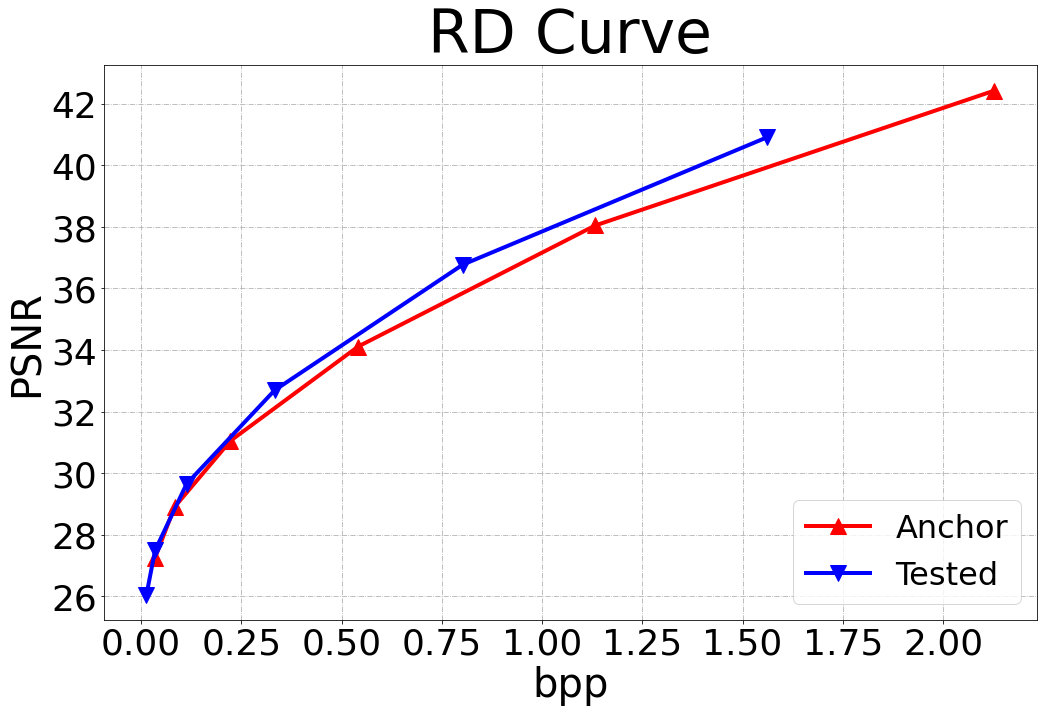

In [4]:
fig, ax = plt.subplots(figsize=(7.3*2,5*2))
plt.plot(R1, PSNR1, label='Anchor', color='red',marker='^', linewidth=4,markersize=16)
plt.plot(R2, PSNR2, label='Tested', color='blue', marker='v', linewidth=4,markersize=16)
ax.locator_params(axis='x', nbins=10)
ax.locator_params(axis='y', nbins=10)
plt.tick_params(labelsize=36)
plt.xlabel("bpp", fontdict={'size':40})
plt.ylabel("PSNR", fontdict={'size':40})
plt.title('RD Curve', fontdict={'size':60})
plt.grid(ls='-.')
plt.legend(loc='lower right', prop={'size':32})
fig.tight_layout()
# fig.savefig('rdcurve.png')